<a href="https://colab.research.google.com/github/udayLab/PAMI/blob/main/notebooks/fuzzyGeoreferencedFrequentPattern/basic/FFSPMiner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovering Fuzzy Frequent Spatial Pattern in Big Data Using FFSPMiner Algorithm

In this tutorial, we will discuss the first approach to find Fuzzy Frequent Spatial Pattern in big data using FFSPMiner algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover Fuzzy Frequent Spatial Pattern using a single minimum support value


***

## <a id='basicApproach'>Basic approach: Executing FFSPMiner on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the FFSPMiner algorithm

In [2]:
from PAMI.fuzzyGeoreferencedFrequentPattern.basic import FFSPMiner  as alg

#### Step 2: Specify the following input parameters

In [3]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/fuzzyDatabases/Fuzzy_T10I4D100K.csv'

minimumSupportCount=100  #Users can also specify this constraint between 0 to 1.
neighborFile='t10_neighbours.txt'
seperator='\t'

#### Step 3: Execute the FFSPMiner algorithm

In [4]:
obj = alg.FFSPMiner(iFile=inputFile, nFile=neighborFile, minSup=minimumSupportCount,sep=seperator)    #initialize
obj.mine()            #Start the mining process

#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [5]:
obj.save(outFile='frequentPatternsMinSupCount1000.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [6]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns

In [7]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 995


##### Step 5.2: Runtime consumed by the mining algorithm

In [8]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 18.179757356643677


##### Step 5.3: Total Memory consumed by the mining algorithm

In [9]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 467648512
Memory (USS): 443969536


# Advanced Tutorial on Implementing FFSPMiner Algorithm

In this tutorial, we will discuss the first approach to find Fuzzy Frequent Spatial Pattern in big data using FFSPMiner algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover Fuzzy Frequent Spatial Pattern using multiple minimum support values.

***

#### In this tutorial, we explain how the FFSPMiner algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the FFSPMiner algorithm and pandas data frame

In [10]:
from PAMI.fuzzyGeoreferencedFrequentPattern.basic import FFSPMiner  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [13]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/fuzzyDatabases/Fuzzy_T10I4D100K.csv'

minimumSupportCountList=[100,150,200,250,300]  #Users can also specify this constraint between 0 to 1.
seperator='\t'
neighborFile='t10_neighbours.txt'
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of FFSPMiner algorithm

#### Step 3: Execute the FFSPMiner algorithm using a for loop

In [14]:
algorithm = 'FFSPMiner'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.FFSPMiner(iFile=inputFile,nFile=neighborFile, minSup=minSupCount, sep=seperator)
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


In [15]:
print(result)

   algorithm  minSup  patterns    runtime     memory
0  FFSPMiner     100       995  17.780457  472702976
1  FFSPMiner     150       835  15.938024  469032960
2  FFSPMiner     200       765  17.180962  466817024
3  FFSPMiner     250       719  15.728047  464265216
4  FFSPMiner     300       677  20.517456  462581760


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [16]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

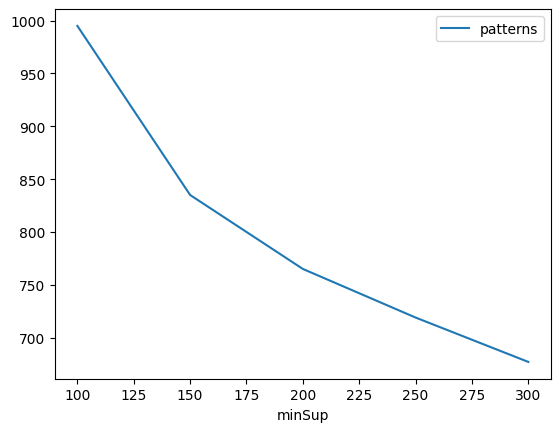

Graph for No Of Patterns is successfully generated!


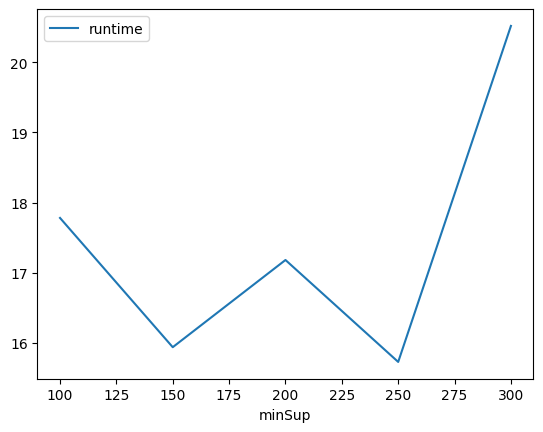

Graph for Runtime taken is successfully generated!


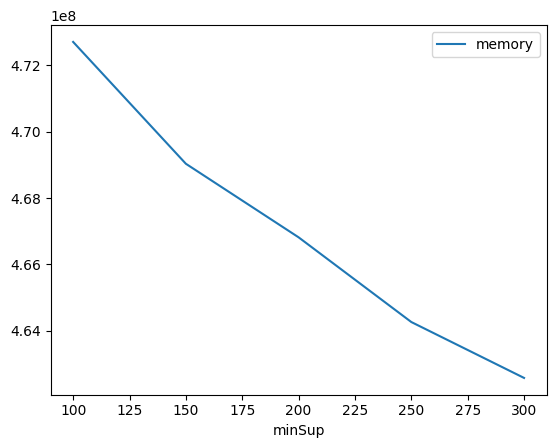

Graph for memory consumption is successfully generated!


In [17]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [18]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
